In [313]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df
print("Train Shape:",df.shape)

Train Shape: (891, 12)


In [314]:
df.info()
null_values_sum=df.isnull().sum()
null_values_sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [315]:
#Data Dictionary
#Survived: 0 = No, 1 = Yes
#pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
#sibsp: # of siblings / spouses aboard the Titanic
#parch: # of parents / children aboard the Titanic
#ticket: Ticket number
#cabin: Cabin number
#embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [316]:
test = pd.read_csv("test.csv")
print("Train Shape:",test.shape)

Train Shape: (418, 11)


In [317]:
test.info()
test_null_values_sum=test.isnull().sum()
test_null_values_sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [318]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [319]:
df = df.drop(['Ticket','Cabin'], axis=1) 
df = df.dropna()

In [320]:
print("Train shape after cleaning : ",df.shape)
df.head()

Train shape after cleaning :  (712, 10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [321]:
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.652174
1       2  0.479769
2       3  0.239437


In [322]:
print(df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex  Survived
0  female  0.752896
1    male  0.205298


In [323]:
print(df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   SibSp  Survived
1      1  0.530055
2      2  0.440000
0      0  0.368870
3      3  0.333333
4      4  0.166667
5      5  0.000000


In [324]:
print(df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Parch  Survived
3      3  0.600000
2      2  0.573529
1      1  0.554545
0      0  0.354528
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [325]:
print(df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

  Embarked  Survived
0        C  0.607692
2        S  0.362816
1        Q  0.285714


(-1, 2)

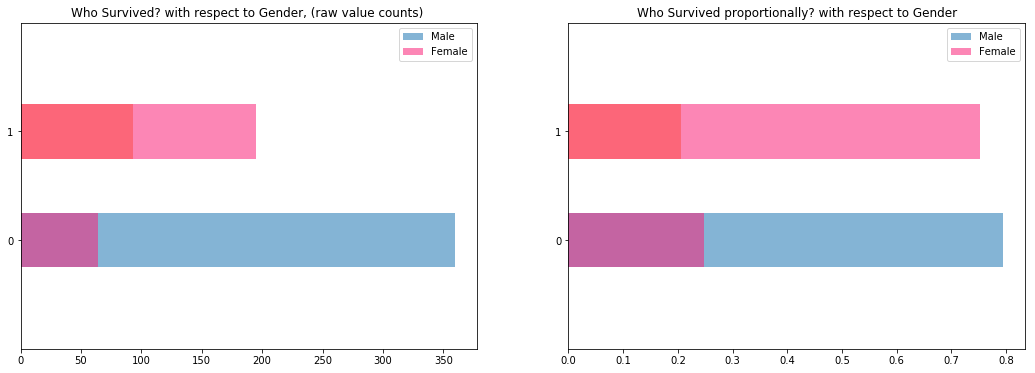

In [326]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

In [327]:
test = test.drop(['Ticket','Cabin'], axis=1) 
test = test.dropna()

In [328]:
print('Test shape after cleaning : ',test.shape)
test.head()

Test shape after cleaning :  (331, 9)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [329]:
train_test_data = [df,test] # combine dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [330]:
df['Title'].value_counts()

Mr          398
Miss        145
Mrs         107
Master       36
Rev           6
Dr            6
Col           2
Major         2
Mlle          2
Ms            1
Jonkheer      1
Sir           1
Mme           1
Countess      1
Lady          1
Don           1
Capt          1
Name: Title, dtype: int64

In [331]:
test['Title'].value_counts()

Mr        182
Miss       64
Mrs        62
Master     17
Rev         2
Col         2
Dona        1
Dr          1
Name: Title, dtype: int64

In [332]:
#Mr : 0
#Miss : 1
#Mrs: 2
#Others: 3
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)


In [333]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [334]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2


In [335]:
df.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [336]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [337]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0


In [338]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [339]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,S,0
1,2,1,1,1,3.0,1,0,71.2833,C,2
2,3,1,3,1,1.0,0,0,7.9250,S,1
3,4,1,1,1,2.0,1,0,53.1000,S,2
4,5,0,3,0,2.0,0,0,8.0500,S,0


In [340]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [341]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,0,0
1,2,1,1,1,3.0,1,0,71.2833,1,2
2,3,1,3,1,1.0,0,0,7.9250,0,1
3,4,1,1,1,2.0,1,0,53.1000,0,2
4,5,0,3,0,2.0,0,0,8.0500,0,0


In [343]:
X_train = df.drop(["Survived","PassengerId"], axis=1)
Y_train = df["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((712, 8), (712,), (331, 8))

In [344]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
dec_tree=acc_decision_tree

94.94

In [345]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
naive_score=acc_gaussian

79.21

In [347]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
svm_score=acc_svc

87.92

In [349]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.39

In [353]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_gaussian, acc_decision_tree]})
models

,Model,Score
0,Support Vector Machines,87.92
1,KNN,85.39
2,Naive Bayes,79.21
3,Decision Tree,94.94
